In [1]:
pip install IPython.display

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement IPython.display (from versions: none)
ERROR: No matching distribution found for IPython.display


In [2]:
pip install sklearn.model_selection

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.model_selection (from versions: none)
ERROR: No matching distribution found for sklearn.model_selection


In [3]:
pip install -U scikit-learn 

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\ASUS\\anaconda3\\Lib\\site-packages\\~klearn\\linear_model\\_cd_fast.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import itertools
from IPython.display import display, HTML
from sklearn import linear_model
from sklearn.model_selection import KFold
from ipywidgets import interact
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact
import ipywidgets as widgets 

from scipy import stats

In [5]:
# Importar el dataset
df = pd.read_csv('Credit.csv')
print(df.head())

    Income  Limit  Rating  Cards  Age  Education  Own Student Married Region  \
0   14.891   3606     283      2   34         11   No      No     Yes  South   
1  106.025   6645     483      3   82         15  Yes     Yes     Yes   West   
2  104.593   7075     514      4   71         11   No      No      No   West   
3  148.924   9504     681      3   36         11  Yes      No      No   West   
4   55.882   4897     357      2   68         16   No      No     Yes  South   

   Balance  
0      333  
1      903  
2      580  
3      964  
4      331  


In [6]:
#Eliminamos estas columnas ya que son categoricas y no las tendremos en cuenta para el ejercicio
columns_to_drop = ['Own', 'Student', 'Married', 'Region']
df.drop(columns=columns_to_drop, inplace=True)
print(df.head())

    Income  Limit  Rating  Cards  Age  Education  Balance
0   14.891   3606     283      2   34         11      333
1  106.025   6645     483      3   82         15      903
2  104.593   7075     514      4   71         11      580
3  148.924   9504     681      3   36         11      964
4   55.882   4897     357      2   68         16      331


In [7]:
df.shape

(400, 7)

In [8]:
x= df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
y= df['Balance']


In [9]:
def get_models(k, X, y):
    """
    Fit all possible models that contain exactly k predictors.
    """
    # List all available predictors
    X_combos = itertools.combinations(list(X.columns), k)
    
    # Fit all models accumulating Residual Sum of Squares (RSS)
    models = []
    for X_label in X_combos:
        # Parse patsy formula
        X_smf = ' + '.join(X_label)
        f     = '{} ~ {}'.format(y.columns[0], X_smf)
        # Fit model
        model = smf.ols(formula=f, data=pd.concat([X, y], axis=1)).fit()
        # Return results
        models += [(f, model)]
    return models


def min_rss(statsmodels):
    """Return model with lowest Residual Sum of Squares (RSS)"""
    return sorted(statsmodels, key=lambda tup: tup[1].ssr)[0]


def max_adjr2(statsmodels):
    """Return model with max R-squared"""
    return sorted(statsmodels, reverse=True, key=lambda tup: tup[1].rsquared_adj)[0]

def min_bic(statsmodels):
    """Return model with min Bayes' Information Criteria"""
    return sorted(statsmodels, reverse=False, key=lambda tup: tup[1].bic)[0]

def min_aic(statsmodels):
    """Return model with min Akaike's Information Criteria"""
    return sorted(statsmodels, reverse=False, key=lambda tup: tup[1].aic)[0]


In [10]:
X = pd.DataFrame({'X': df['Income'],
                  'X2': df['Limit'],
                  'X3': df['Rating'],
                  'X4': df['Cards'],
                  'X5': df['Age'],
                  'X6': df['Education']})
y = pd.DataFrame({'y': df['Balance']})

# get all model results
model_subsets = []
for k in range(len(X.columns)):
    k=k+1
    subset = get_models(k, X, y)
    model_subsets += [subset]
    print('Progess: k = {}, done'.format(k))

Progess: k = 1, done
Progess: k = 2, done
Progess: k = 3, done
Progess: k = 4, done
Progess: k = 5, done
Progess: k = 6, done


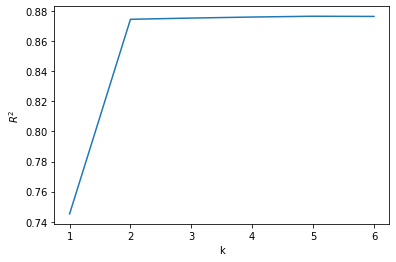

Model selected: 
Intercept   -449.361011
X             -7.562110
X2             0.128553
X3             2.022405
X4            11.552721
X5            -0.888316
dtype: float64


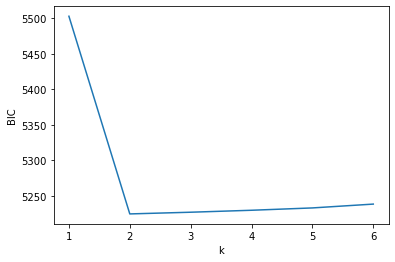

Model selected: 
Intercept   -534.812150
X             -7.672124
X3             3.949265
dtype: float64


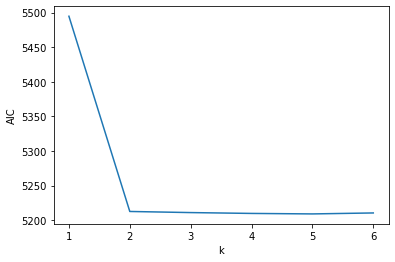

Model selected: 
Intercept   -449.361011
X             -7.562110
X2             0.128553
X3             2.022405
X4            11.552721
X5            -0.888316
dtype: float64


In [11]:
# Get predictor count
k = np.arange(1, len(X.columns)+1)

# adjr2
# ------------------------------------------------
display(HTML('<h4>Adjusted R^2</h4>'))

# Plot best r-squared score for each subset
adjr2 = [max_adjr2(m)[1].rsquared_adj for m in model_subsets]

sns.lineplot(x=k, y=adjr2)
plt.xlabel('k')
plt.ylabel('$R^2$')
plt.show()

# Select best subset
coefs_r2 = [(max_adjr2(m)[1].rsquared_adj, max_adjr2(m)[1].params) for m in model_subsets]
print('Model selected: \n{}'.format(max(coefs_r2)[1]))


# Bayes' Information Criteria (BIC)
# ------------------------------------------------
display(HTML('<h4>Bayes\' Information Criteria</h4>'))

# Get best BIC
bic = [min_bic(m)[1].bic for m in model_subsets]

sns.lineplot(x=k, y=bic)
plt.xlabel('k')
plt.ylabel('BIC')
plt.show()

# Select best subset
coefs_bic = [(min_bic(m)[1].bic, min_bic(m)[1].params) for m in model_subsets]
print('Model selected: \n{}'.format(min(coefs_bic)[1]))


# Akaike's Information Criteria (AIC/ C_p)
# ------------------------------------------------
display(HTML('<h4>Akaike\'s Information Criteria</h4>'))

# Get best AIC
aic = [min_aic(m)[1].aic for m in model_subsets]

sns.lineplot(x=k, y=aic)
plt.xlabel('k')
plt.ylabel('AIC')
plt.show()

# Select best subset
coefs_aic = [(min_aic(m)[1].aic, min_aic(m)[1].params) for m in model_subsets]
print('Model selected: \n{}'.format(min(coefs_aic)[1]))

"BIC penaliza más la complejidad que AIC, busca el modelo más abstracto, más sencillo y que hace predicciones en un contexto más amplio. Por su parte AIC dará con un modelo más complejo y pragmático que hace predicciones con mayor detalle dentro de nuestros propios datos."
(Cosas que conviene saber al usar AIC, DIC y otros criterios de información, s. f.)

Basándose en lo anterior, teniendo en cuenta los resultados arrojados en las gráficas y desde una perspectiva de complejidad, el mejor modelo es el que incluye las variables X1, X2, X3, X4 y X5, en concenso con los resultados de que arrojaron los gráficos de los criterios de R^2 austado y AIC, ya que contienen un R^2 ajustado alto, lo que sugiere un buen ajuste a los datos. Lo que se busca es un modelo más complejo que haga predicciones con mayor detalle dentro de los datos.

### Forward y Backward

In [12]:
def forward_stepwise(X, y, scorer='ssr', results=[(0, [])]):
    """Perform forward stepwise variable selection as described in
    An Introductions to Statistical Learning (p.207)
    Returns pandas dataframe object  with results for each step"""
    # List predictors that havent's been used so far
    p_all    = list(X.columns)
    p_used   = results[-1][1]
    p_unused = [p for p in p_all if p not in p_used]
    
    # Job done, exit recursion
    if not p_unused:
        scores = [r[0] for r in results]
        preds  = [r[1] for r in results]
        return pd.DataFrame({scorer: scores, 'predictors': preds}).drop(0)
    
    # Get score for each possible additional predictor
    r = []
    for p in p_unused:
        f     = '{} ~ {}'.format(y.columns[0], '+'.join([p]+p_used))
        # Fit model
        model = smf.ols(formula=f, data=pd.concat([X, y], axis=1)).fit()
        r    += [(model, [p]+p_used)]
    
    # Choose predictor which yields best score
    if scorer == 'ssr':
        best_model = sorted(r, key=lambda tup: tup[0].ssr)[0]
        best_score = (best_model[0].ssr, best_model[1])
    elif scorer == 'rsquared_adj':
        best_model = sorted(r, key=lambda tup: tup[0].rsquared_adj)[-1]
        best_score = (best_model[0].rsquared_adj, best_model[1])        
    elif scorer == 'bic':
        best_model = sorted(r, key=lambda tup: tup[0].bic)[0]
        best_score = (best_model[0].bic, best_model[1]) 
    elif scorer == 'aic':
        best_model = sorted(r, key=lambda tup: tup[0].aic)[0]
        best_score = (best_model[0].aic, best_model[1]) 
                        
    new_results = results + [best_score]
    # Recursive call to self
    return forward_stepwise(X, y, scorer, new_results)

In [13]:
def backward_stepwise(X, y, scorer='ssr', results=[]):
    """Perform backward stepwise variable selection as described in
    An Introductions to Statistical Learning (p.209)
    Returns pandas dataframe object  with results for each step"""
    # List predictors that havent's been used so far
    p_all = list(X.columns)

    # Check if we're starting out here
    if not results:
        # Fit model with all features
        f     = '{} ~ {}'.format(y.columns[0], '+'.join(p_all))
        model = smf.ols(formula=f, data=pd.concat([X, y], axis=1)).fit()
        # Begin backward stepwise recursion
        if scorer == 'ssr':
            return backward_stepwise(X, y, scorer, [(model.ssr, p_all)])
        if scorer == 'rsquared_adj':
            return backward_stepwise(X, y, scorer, [(model.rsquared_adj, p_all)])
        if scorer == 'bic':
            return backward_stepwise(X, y, scorer, [(model.bic, p_all)])
        if scorer == 'aic':
            return backward_stepwise(X, y, scorer, [(model.aic, p_all)])
    else:
        p_used = results[-1][1]
    
    # Job done, exit recursion
    if len(p_used) == 1:
        scores = [r[0] for r in results]
        preds  = [r[1] for r in results]
        return pd.DataFrame({scorer: scores, 'predictors': preds})    
    
    # Get rss score for each possible removed predictor
    r = []
    for p in p_used:
        p_test = [i for i in p_used if i != p]
        f     = '{} ~ {}'.format(y.columns[0], '+'.join(p_test))
        # Fit model
        model = smf.ols(formula=f, data=pd.concat([X, y], axis=1)).fit()
        r     += [(model, p_test)]
    
    # Choose removal of predictor which yields best score
    if scorer == 'ssr':
        best_model = sorted(r, key=lambda tup: tup[0].ssr)[0]
        best_score = (best_model[0].ssr, best_model[1])
    elif scorer == 'rsquared_adj':
        best_model = sorted(r, key=lambda tup: tup[0].rsquared_adj)[-1]
        best_score = (best_model[0].rsquared_adj, best_model[1])        
    elif scorer == 'bic':
        best_model = sorted(r, key=lambda tup: tup[0].bic)[0]
        best_score = (best_model[0].bic, best_model[1]) 
    elif scorer == 'aic':
        best_model = sorted(r, key=lambda tup: tup[0].aic)[0]
        best_score = (best_model[0].aic, best_model[1]) 

    new_results = results + [best_score]
    # Recursive call to self
    return backward_stepwise(X, y, scorer, new_results)


def subset_analysis(df, scorer):
    """Renders results from forward_stepwise() and backward_stepwise()"""
    df['predictors_str'] = df['predictors'].astype(str)
    
    ax = sns.lineplot(x='predictors_str', y=scorer, data=df, sort=False)
    plt.xticks(rotation=90)
    plt.show();
    
    if scorer == 'rsquared_adj':
        display(df[df[scorer] ==  df[scorer].max()].drop('predictors_str', axis=1))
    else:
        display(df[df[scorer] ==  df[scorer].min()].drop('predictors_str', axis=1))

#### Forward stepwise selection

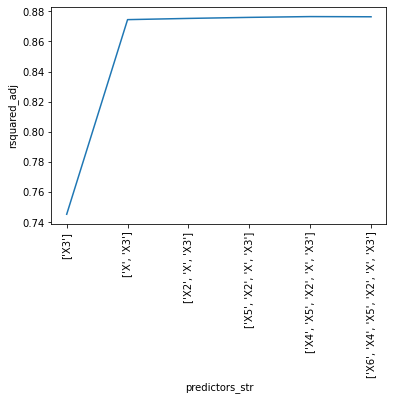

,rsquared_adj,predictors
5,0.876515,"[X4, X5, X2, X, X3]"


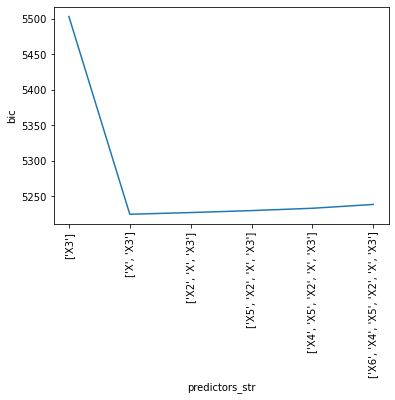

,bic,predictors
2,5224.531479,"[X, X3]"


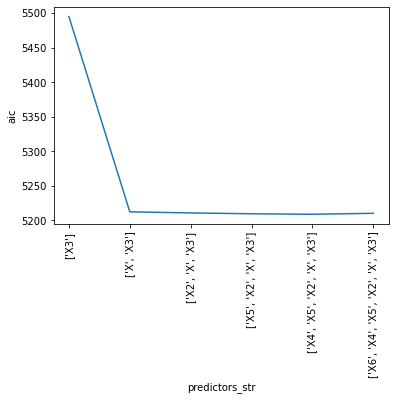

,aic,predictors
5,5209.013438,"[X4, X5, X2, X, X3]"


In [14]:
# adjr2
# ------------------------------------------------
display(HTML('<h4>Adjusted R^2</h4>'))
scorer = 'rsquared_adj'
subset_analysis(forward_stepwise(X, y, scorer=scorer), scorer)

# Bayes' Information Criteria (BIC)
# ------------------------------------------------
display(HTML('<h4>Bayes\' Information Criteria</h4>'))
scorer = 'bic'
subset_analysis(forward_stepwise(X, y, scorer=scorer), scorer)

# Akaike's Information Criteria (AIC/ C_p)
# ------------------------------------------------
display(HTML('<h4>Akaike\'s Information Criteria</h4>'))
scorer = 'aic'
subset_analysis(forward_stepwise(X, y, scorer=scorer), scorer)

- El modelo con R^2 Ajustado es el más alto, por lo tanto es el más completo en términos de predictores como el más complicado.

- El modelo más sencillo, es con BIC, tiene solo dos predictores, pero aún ofrece un buen ajuste.

- En términos de los predictores seleccionados, el modelo con el AIC coincide con el modelo de R^2 Ajustado más alto.

Teniendo en cuenta las conclusiones generales, y lo decidido en el aterior modelo, el ajuste máximo es esencial y en esta instancia no se le da prioridad a la complejidad adicional, el modelo con el ajuste R^2 más alto (cinco predictores) X1, X2, X3, X4 y X5, es el más adecuado, y el AIC respalda la elección de este.

#### Backward stepwise selection

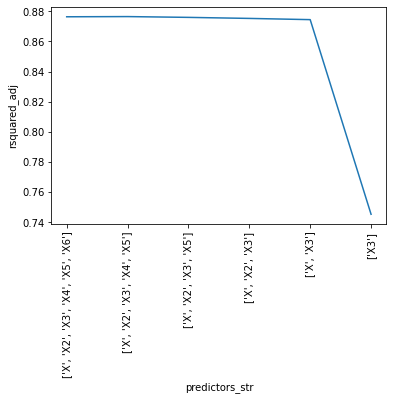

,rsquared_adj,predictors
1,0.876515,"[X, X2, X3, X4, X5]"


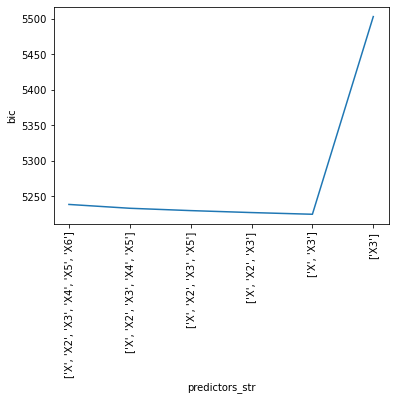

,bic,predictors
4,5224.531479,"[X, X3]"


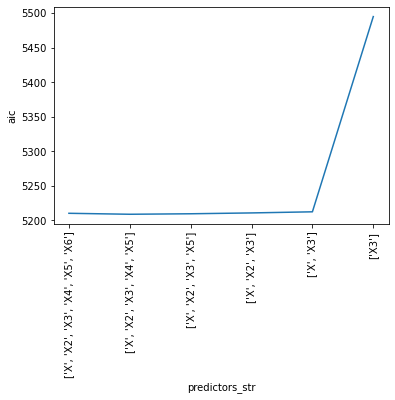

,aic,predictors
1,5209.013438,"[X, X2, X3, X4, X5]"


In [15]:
# adjr2
# ------------------------------------------------
display(HTML('<h4>Adjusted R^2</h4>'))
scorer = 'rsquared_adj'
subset_analysis(backward_stepwise(X, y, scorer=scorer), scorer)

# Bayes' Information Criteria (BIC)
# ------------------------------------------------
display(HTML('<h4>Bayes\' Information Criteria</h4>'))
scorer = 'bic'
subset_analysis(backward_stepwise(X, y, scorer=scorer), scorer)

# Akaike's Information Criteria (AIC/ C_p)
# ------------------------------------------------
display(HTML('<h4>Akaike\'s Information Criteria</h4>'))
scorer = 'aic'
subset_analysis(backward_stepwise(X, y, scorer=scorer), scorer)

Los resultados obtenidos en el modelo de Backward, son congruentes con los obtenidos en Forward, lo que nos lleva a tomar la misma decisión y a concluir exactamente lo mismo en términos de elección de predictores (X1, X2, X3, X4, X5).

## Referencias

Cosas que conviene saber al usar AIC, DIC y otros criterios de información. (s. f.). Juan Rubalcaba. https://jrubalcaba.github.io/posts/information_criterion/